# REGRESIÓN LOGÍSTICA

**INTRODUCCIÓN**

El problema que buscaremos trabajar en este ejercicio de práctica será el de predecir
si se aprueba o no un exámen a partir de la cantidad de horas de estudio que dedicó el estudiante.

**CONTENIDO**    
1.Tips regresión logística.   
2.Importación y preparación del dataset.       
3.Información general del dataset.      
4.Modelo de regresión logística.    
5.Evaluación del modelo.     
6.Fuente del dataset. 

**TIPS REGRESIÓN LOGÍSTICA**

La regresión logística, es un modelo lineal para la clasificación en lugar de la regresión. La regresión logística también se la suele nombrar como regresión logit, clasificación de máxima entropía (MaxEnt) o el clasificador log-lineal.

Nos permitirá resolver problemas de clasificación, mediante la predicción de resultados categóricos. 

**IMPORTACIÓN Y PREPARACIÓN DEL DATASET**

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns  # seaborn para plotear 

#Regresión logística
# ==============================================================================
from sklearn import linear_model
from sklearn.model_selection import train_test_split #crear datos train y test
from sklearn import model_selection


#Evaluación del modelo
# ==============================================================================
import sklearn.metrics as sm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
#DATASET
dataset = pd.read_csv('horasexamen.csv', encoding = "ISO-8859-1", delimiter=',')  

#Exploramos el dataset
dataset.keys()

Index(['Horas', 'Puntaje'], dtype='object')

In [22]:
#vamos a crear una columna donde indicaremos si la nota es mayor o igual a 60 aplicamos 1 que es aprobado.
dataset['Condición'] = dataset['Puntaje'].apply(lambda x: 1 if x >= 60 else 0)

**INFORMACIÓN DEL DATASET**

In [18]:
dataset.shape

(71, 3)

In [19]:
dataset.head()

,Horas,Puntaje,Condición
0,1.8,22,0
1,2.5,23,0
2,2.8,23,0
3,1.1,25,0
4,1.5,26,0


In [20]:
dataset.describe()

,Horas,Puntaje,Condición
count,71.000000,71.000000,71.000000
mean,9.177465,62.985915,0.633803
std,5.803009,23.570255,0.485193
min,1.100000,22.000000,0.000000
25%,4.100000,41.000000,0.000000
50%,8.000000,69.000000,1.000000
75%,14.000000,81.500000,1.000000
max,20.600000,99.000000,1.000000


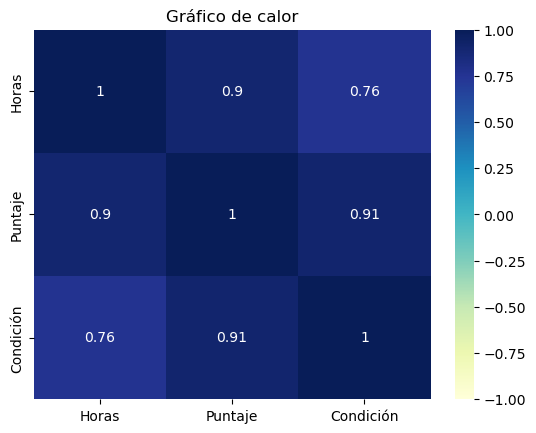

In [21]:
#graficaremos la matriz de correlación 
corr=dataset.corr()

sns.heatmap(corr,annot=True,cmap='YlGnBu',vmax=1,vmin=-1)
plt.title('Gráfico de calor')
plt.show()


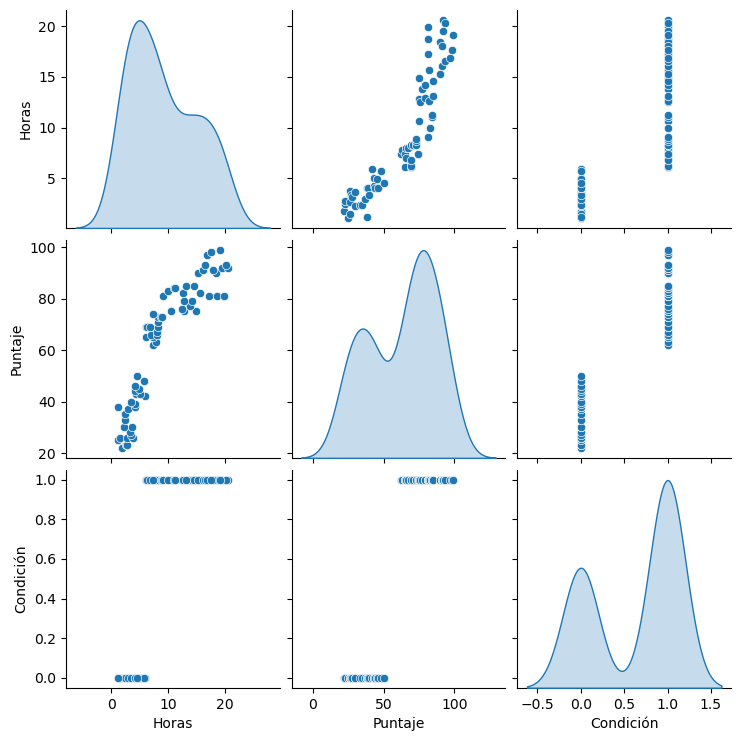

In [23]:
#graficamos todo con pairplot
sns.pairplot(dataset,diag_kind='kde',)
plt.show()

In [31]:
X=dataset['Horas'].values.reshape(-1,1)
y=dataset['Condición']
X.shape

(71, 1)

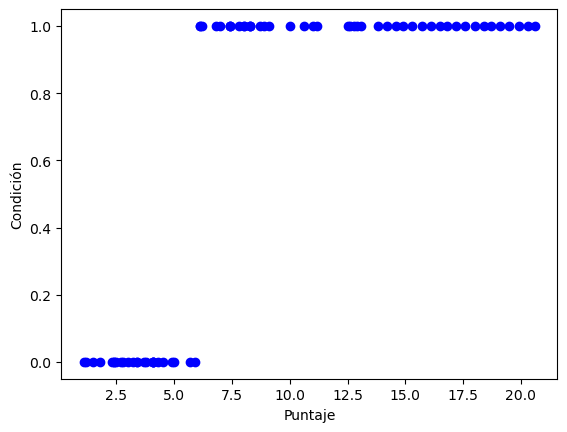

In [35]:
# Crear el gráfico de dispersión
plt.scatter(X, y, color='blue')


# Agregar etiquetas de los ejes y título del gráfico
plt.xlabel('Puntaje')
plt.ylabel('Condición')
#plt.title('Titulo')

#plt.xlim(0,1.2) #limite para el eje x.
#plt.ylim(0,1.5) #limite para el eje y.

#plt.legend() #le indico donde poner la leyenda (horizontal, vertical)
#plt.grid() #adicionar una grilla
plt.show()

**MODELO DE REGRESIÓN**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, shuffle=True)

In [43]:
# Creamos un objeto de regresión lineal
clasificador = linear_model.LogisticRegression(solver='lbfgs', C=100)

#max_iter int, por defecto=100 Número máximo de iteraciones necesarias para que los solucionadores converjan.
#solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
#Algorithm to use in the optimization problem. Default is ‘lbfgs’. 

# Ajustamos la regresión a los datos de entrenamiento
clasificador.fit(X_train, y_train)

# Y a partir de datos de regresión encontrados
y_pred_test = clasificador.predict(X_test)


In [53]:
horas_test = np.array([1,2,4,5.1,5.6,5.8,6,12,18]).reshape(-1,1)
pred_ejemplo = clasificador.predict(horas_test)
print(pred_ejemplo)

[0 0 0 0 0 0 1 1 1]


**EVALUACIÓN DEL MODELO**

In [51]:
print(round(clasificador.score(X_test,y_test),2))

0.93


**FUENTE DEL DATASET**

.